In [1]:
from jeffutils.utils import reimport
from pprint import pprint

from data_loader import *
reimport(["from data_loader import *"], globals())

date_time = dt.datetime.now().strftime(date_format)

2 models 	['dl_fold', 'dl_softfold'] on
4 datasets 	['digits', 'fashionMNIST', 'cancer', 'cifar10'] at 241026@1046

Testing dl_fold on digits
	X shape:  (1437, 64)
	y shape:  (1437,)


Benchmarking 3 'dl_fold's on 143 samples:  33%|███▎      | 2/6 [00:23<00:49, 12.27s/it]

Made a new directory results/digits/dl_fold/npy_files


Benchmarking 3 'dl_fold's on 287 samples: 100%|██████████| 6/6 [01:05<00:00, 10.87s/it]


Testing dl_softfold on digits
	X shape:  (1437, 64)
	y shape:  (1437,)


Benchmarking 3 'dl_softfold's on 143 samples:  33%|███▎      | 2/6 [00:16<00:34,  8.62s/it]

Made a new directory results/digits/dl_softfold/npy_files


Benchmarking 3 'dl_softfold's on 287 samples: 100%|██████████| 6/6 [00:51<00:00,  8.58s/it]


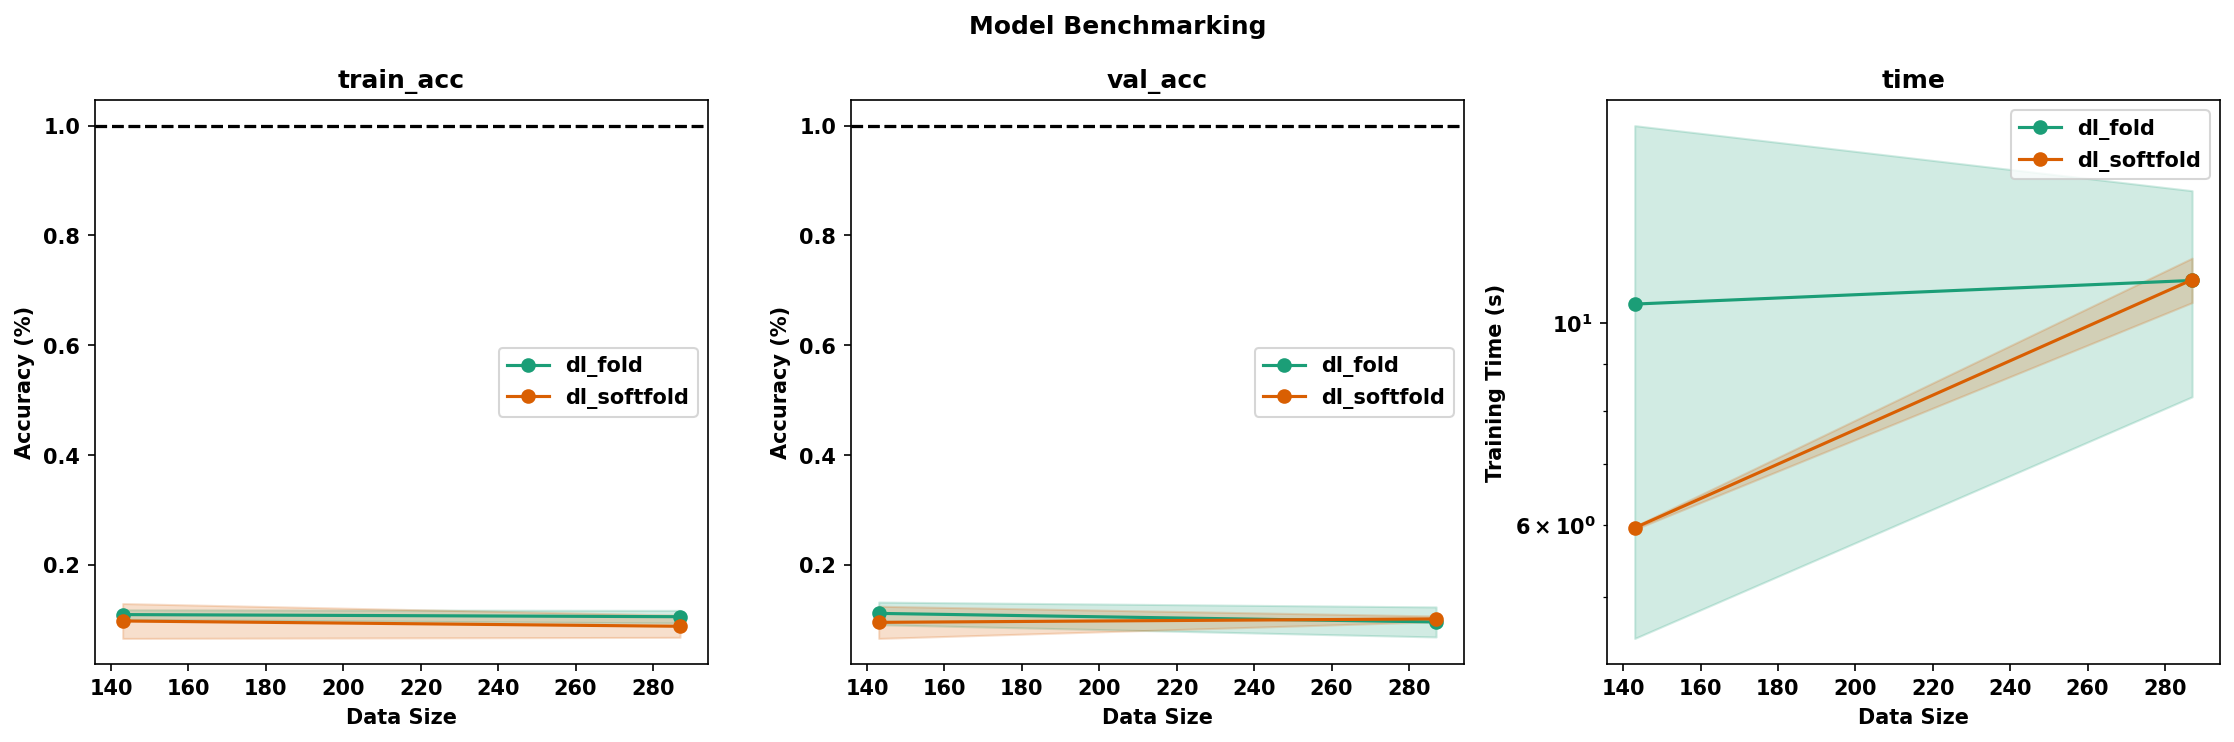

c:\Users\dalli\source\repos\FoldAndCutNetworks\BenchmarkTests\data_loader.py:192: UserWarning: random_state is not implemented for this dataset, ignoring the provided value.
  warnings.warn("random_state is not implemented for this dataset, ignoring the provided value.")


Testing dl_fold on fashionMNIST
	X shape:  (60000, 784)
	y shape:  (60000,)


Benchmarking 3 'dl_fold's on 6000 samples:  33%|███▎      | 2/6 [11:19<23:54, 358.73s/it] 

Made a new directory results/fashionMNIST/dl_fold/npy_files


Benchmarking 3 'dl_fold's on 12000 samples: 100%|██████████| 6/6 [48:32<00:00, 485.48s/it]
c:\Users\dalli\source\repos\FoldAndCutNetworks\BenchmarkTests\data_loader.py:192: UserWarning: random_state is not implemented for this dataset, ignoring the provided value.
  warnings.warn("random_state is not implemented for this dataset, ignoring the provided value.")


Testing dl_softfold on fashionMNIST
	X shape:  (60000, 784)
	y shape:  (60000,)


Benchmarking 3 'dl_softfold's on 6000 samples:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [2]:
test_results = {}
verbose = 2
new_set = False
repeat = 3

if new_set:
    date_time = dt.datetime.now().strftime(date_format)

if verbose > 0:
    print(f"{len(benchmark_models)} models \t{benchmark_models} on")
    print(f"{len(benchmark_datasets)} datasets \t{benchmark_datasets} at {date_time}\n")
if verbose > 1:
    pprint(config)

for dataset_name in benchmark_datasets:
    test_results[dataset_name] = {}
    for model_name in benchmark_models:
        try:
            results, sizes = test_model(model_name, date_time, dataset_name, 
                                        return_sizes=True, repeat=repeat, verbose=verbose)
            test_results[dataset_name].update(results)
        except InvalidModelError as e:
            print(f"Error: {e}")
            print(f"Skipping {model_name} on {dataset_name}")
            continue
    constants = (sizes, date_time, dataset_name)
    plot_results(test_results[dataset_name], constants, 
                 save_fig=True, replace_fig=True, from_data=False)